In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Базовая работа с изображением

In [2]:
image = cv2.imread('sar_2_color.jpg')

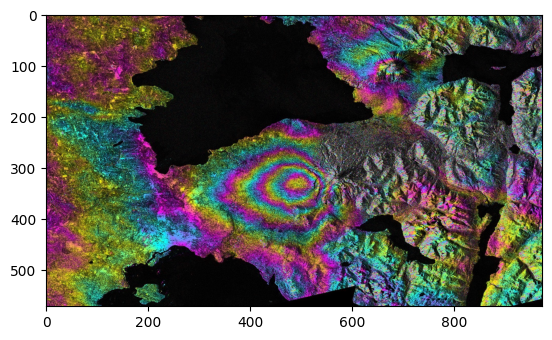

In [3]:
plt.imshow(image)

In [4]:
image.shape # h,w,c

(572, 974, 3)

In [5]:
image[250,250] # b,g,r

array([12, 12, 12], dtype=uint8)

In [6]:
# ROI
img_roi = image[100:200, 500:700]

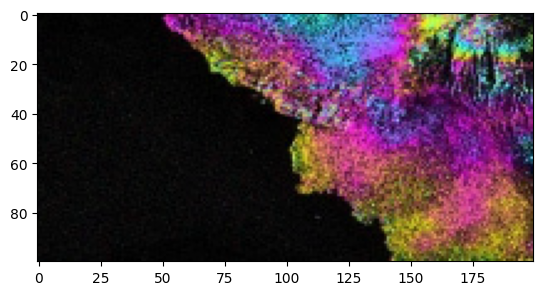

In [7]:
plt.imshow(img_roi)

In [8]:
b,g,r = cv2.split(image)

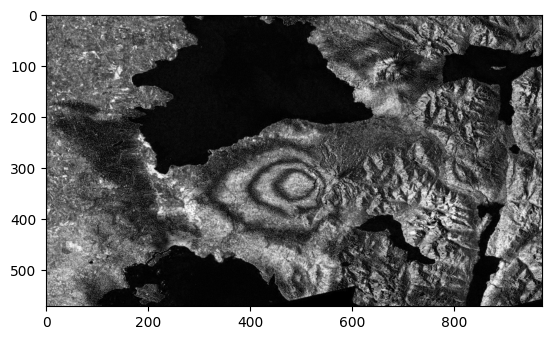

In [9]:
plt.imshow(b, cmap = 'gray')

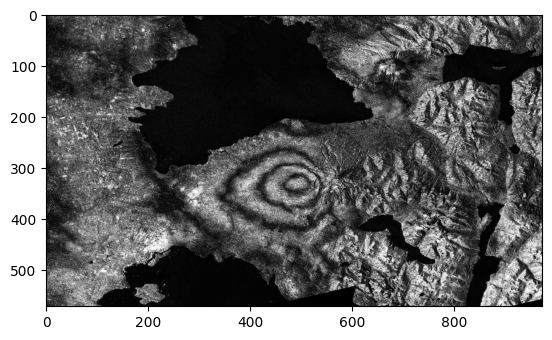

In [10]:
plt.imshow(g, cmap = 'gray')

In [11]:
# alternative approach
b = image[:,:,0]

In [12]:
import copy

image2 = copy.deepcopy(image)

In [13]:
image2[50:100,50:100] = [0,0,0]

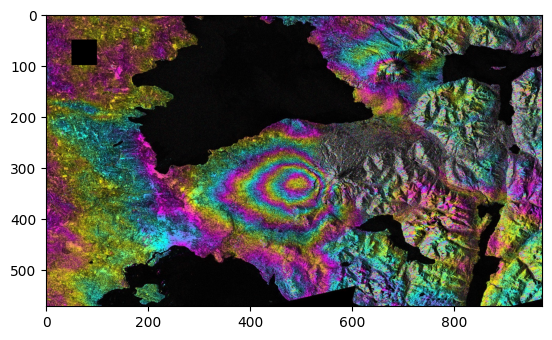

In [14]:
plt.imshow(image2)

In [15]:
# empty image
image_template = np.zeros(image.shape,np.uint8)

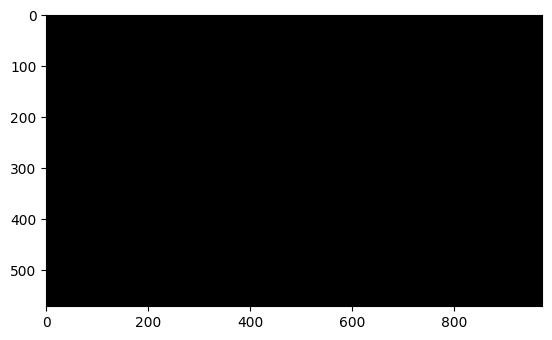

In [16]:
plt.imshow(image_template)

# Конвертация цветовых моделей

In [17]:
image_template[0,0]

array([0, 0, 0], dtype=uint8)

In [18]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [19]:
image_gray[0,0]

np.uint8(40)

In [20]:
image_gray.shape

(572, 974)

In [21]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [22]:
image_hsv.shape

(572, 974, 3)

In [23]:
image_hsv[0,0]

array([117, 143,  75], dtype=uint8)

In [24]:
image[0,0]

array([75, 37, 33], dtype=uint8)

In [25]:
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

In [26]:
image_lab[0,0]

array([ 42, 139, 104], dtype=uint8)

# Пороговая фильтрация

In [27]:
_,thresh1 = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)

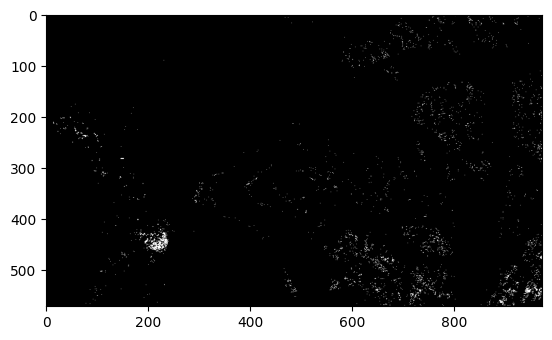

In [28]:
plt.imshow(thresh1, cmap='gray')

In [29]:
thresh1[thresh1==100].sum()

np.uint64(0)

# Построение гистограммы

In [30]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

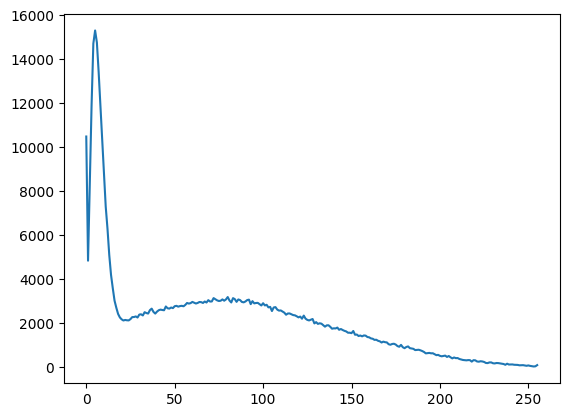

In [31]:
plt.plot(b_hist)

In [32]:
b_hist_cum = b_hist.cumsum()

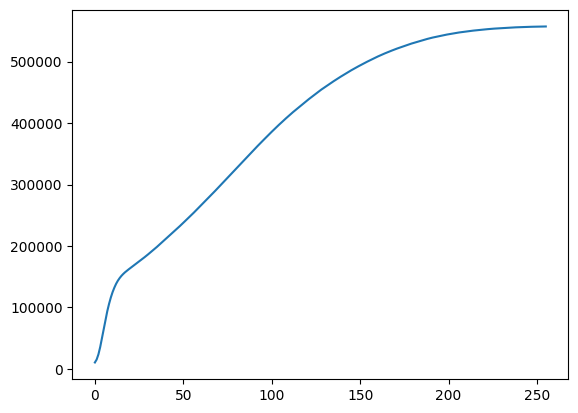

In [33]:
plt.plot(b_hist_cum)

In [34]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])

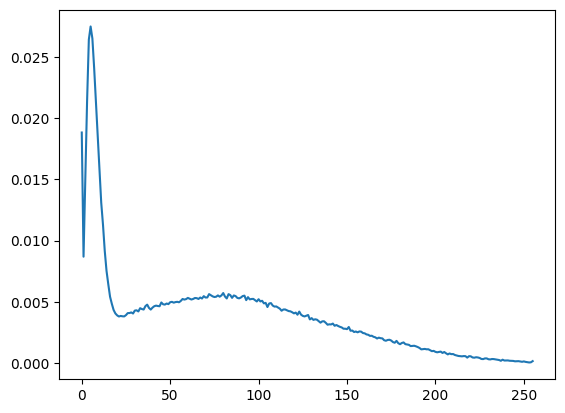

In [35]:
plt.plot(b_hist_norm)

# Сравнение двух изображений

In [36]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim, diff) = structural_similarity(image_gray, image_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

SSIM: 1.0


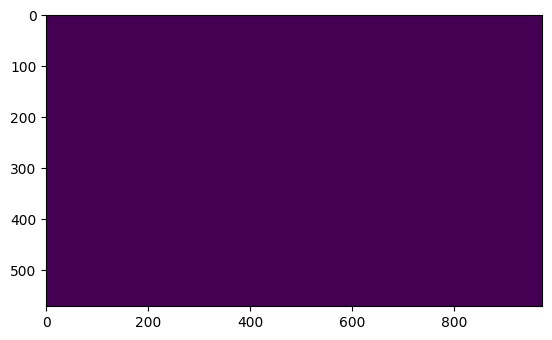

In [37]:
plt.imshow(diff)

In [38]:
mse = mean_squared_error(image_gray, image_gray)
mse

np.float64(0.0)

# Статистические характеристики изображений

In [39]:
mean = image_gray.mean()

In [40]:
std = image_gray.std()

In [41]:
print(mean,std)

67.41225535245043 52.016191875959635


In [42]:
eq_gray = cv2.equalizeHist(image_gray)

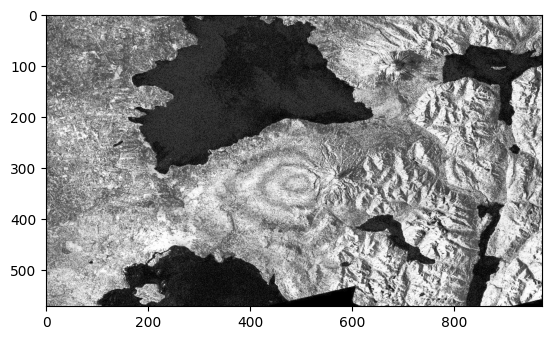

In [43]:
plt.imshow(eq_gray, cmap="gray")


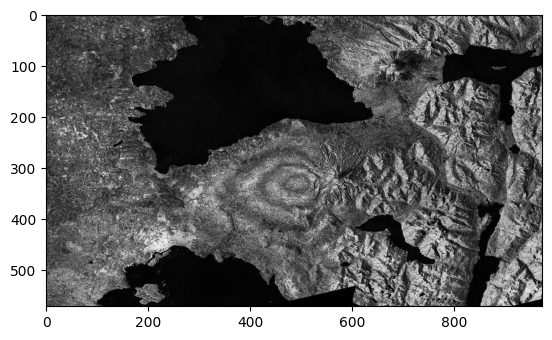

In [44]:
plt.imshow(image_gray, cmap="gray")

In [ ]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg.
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат


# Загрузка изображения

In [79]:
img_gray = cv2.imread('/content/sar_1_gray.jpg', cv2.IMREAD_GRAYSCALE)

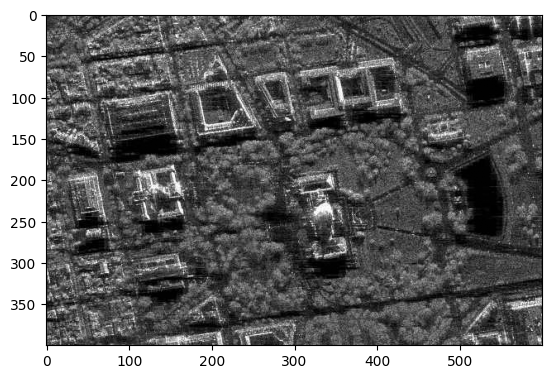

In [80]:
plt.imshow(img_gray, cmap="gray")

# Исходная гистограмма

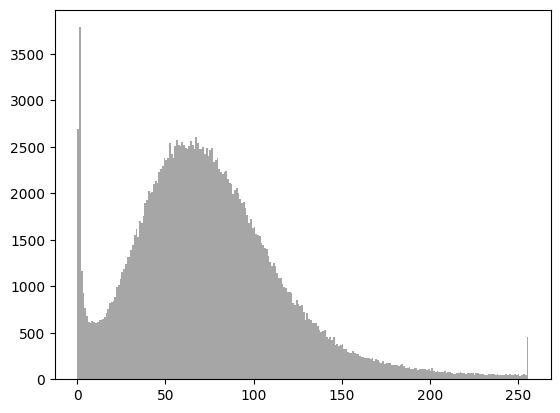

In [81]:
plt.hist(img_gray.ravel(), bins=256, range=(0,256), color='gray', alpha=0.7)

plt.show()

# Гамма-коррекция с параметрами > 1, < 1

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

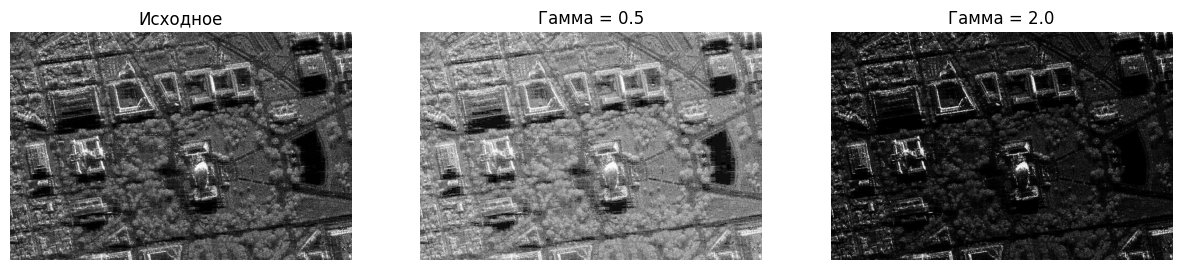

In [82]:
gamma_low = 0.5   # осветление
gamma_high = 2.0  # затемнение

# Нормализация и применение гаммы
img_norm = img_gray / 255.0
img_gamma_low = (np.power(img_norm, gamma_low) * 255).astype(np.uint8)
img_gamma_high = (np.power(img_norm, gamma_high) * 255).astype(np.uint8)

# Отображение результатов гамма-коррекции
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
plt.title('Исходное')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(img_gamma_low, cmap='gray', vmin=0, vmax=255)
plt.title(f'Гамма = {gamma_low}')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(img_gamma_high, cmap='gray', vmin=0, vmax=255)
plt.title(f'Гамма = {gamma_high}')
plt.axis('off')

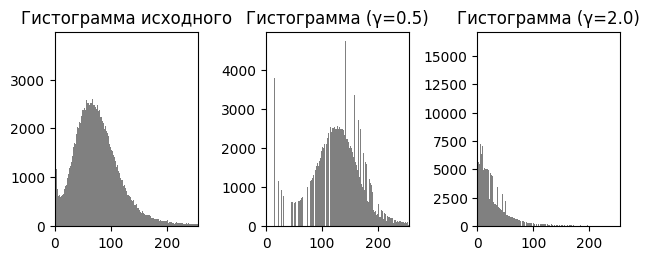

In [83]:
plt.subplot(2,3,4)
plt.hist(img_gray.ravel(), bins=256, range=(0,256), color='gray')
plt.title('Гистограмма исходного')
plt.xlim([0,255])

plt.subplot(2,3,5)
plt.hist(img_gamma_low.ravel(), bins=256, range=(0,256), color='gray')
plt.title('Гистограмма (γ=0.5)')
plt.xlim([0,255])

plt.subplot(2,3,6)
plt.hist(img_gamma_high.ravel(), bins=256, range=(0,256), color='gray')
plt.title('Гистограмма (γ=2.0)')
plt.xlim([0,255])

plt.tight_layout()
plt.show()

# Сравнение с исходным изображением (MSE и SSIM)

In [84]:
mse_low = mean_squared_error(img_gray, img_gamma_low)
ssim_low = structural_similarity(img_gray, img_gamma_low, data_range=255)
print(f"Исходное vs γ=0.5: MSE = {mse_low:.2f}, SSIM = {ssim_low:.4f}")

mse_high = mean_squared_error(img_gray, img_gamma_high)
ssim_high = structural_similarity(img_gray, img_gamma_high, data_range=255)
print(f"Исходное vs γ=2.0: MSE = {mse_high:.2f}, SSIM = {ssim_high:.4f}")

Исходное vs γ=0.5: MSE = 3250.43, SSIM = 0.7875
Исходное vs γ=2.0: MSE = 2383.76, SSIM = 0.5270


# Эквализация гистограммы

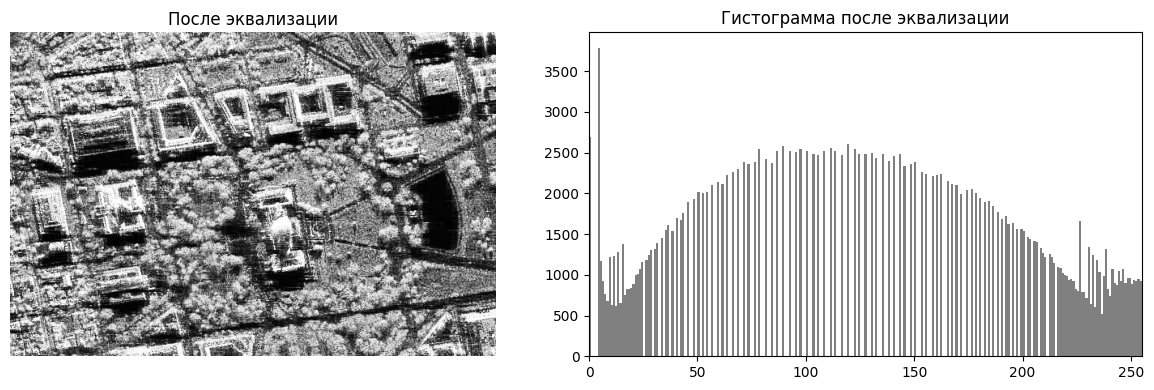

In [85]:
img_eq = cv2.equalizeHist(img_gray)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(img_eq, cmap='gray', vmin=0, vmax=255)
plt.title('После эквализации')
plt.axis('off')

plt.subplot(1,2,2)
plt.hist(img_eq.ravel(), bins=256, range=(0,256), color='gray')
plt.title('Гистограмма после эквализации')
plt.xlim([0,255])
plt.tight_layout()
plt.show()

# Статистическая цветокоррекция цветного изображения

In [89]:
img_color = cv2.imread('/content/sar_2_color.jpg')

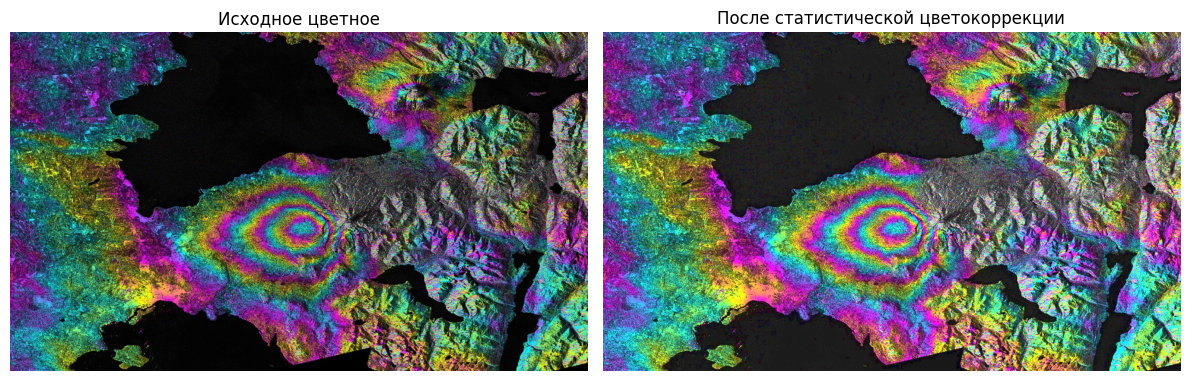

In [90]:
img_color_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV).astype(np.float32)
h, s, v = cv2.split(img_hsv)

mean_eq = np.mean(img_eq)
std_eq = np.std(img_eq)

mean_v = np.mean(v)
std_v = np.std(v)

new_v = (v - mean_v) * (std_eq / (std_v + 1e-8)) + mean_eq
new_v = np.clip(new_v, 0, 255).astype(np.uint8)

img_hsv_corrected = cv2.merge([h.astype(np.uint8), s.astype(np.uint8), new_v])
img_corrected_bgr = cv2.cvtColor(img_hsv_corrected, cv2.COLOR_HSV2BGR)
img_corrected_rgb = cv2.cvtColor(img_corrected_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_color_rgb)
plt.title('Исходное цветное')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_corrected_rgb)
plt.title('После статистической цветокоррекции')
plt.axis('off')
plt.tight_layout()
plt.show()

# Пороговая фильтрация с разными параметрами

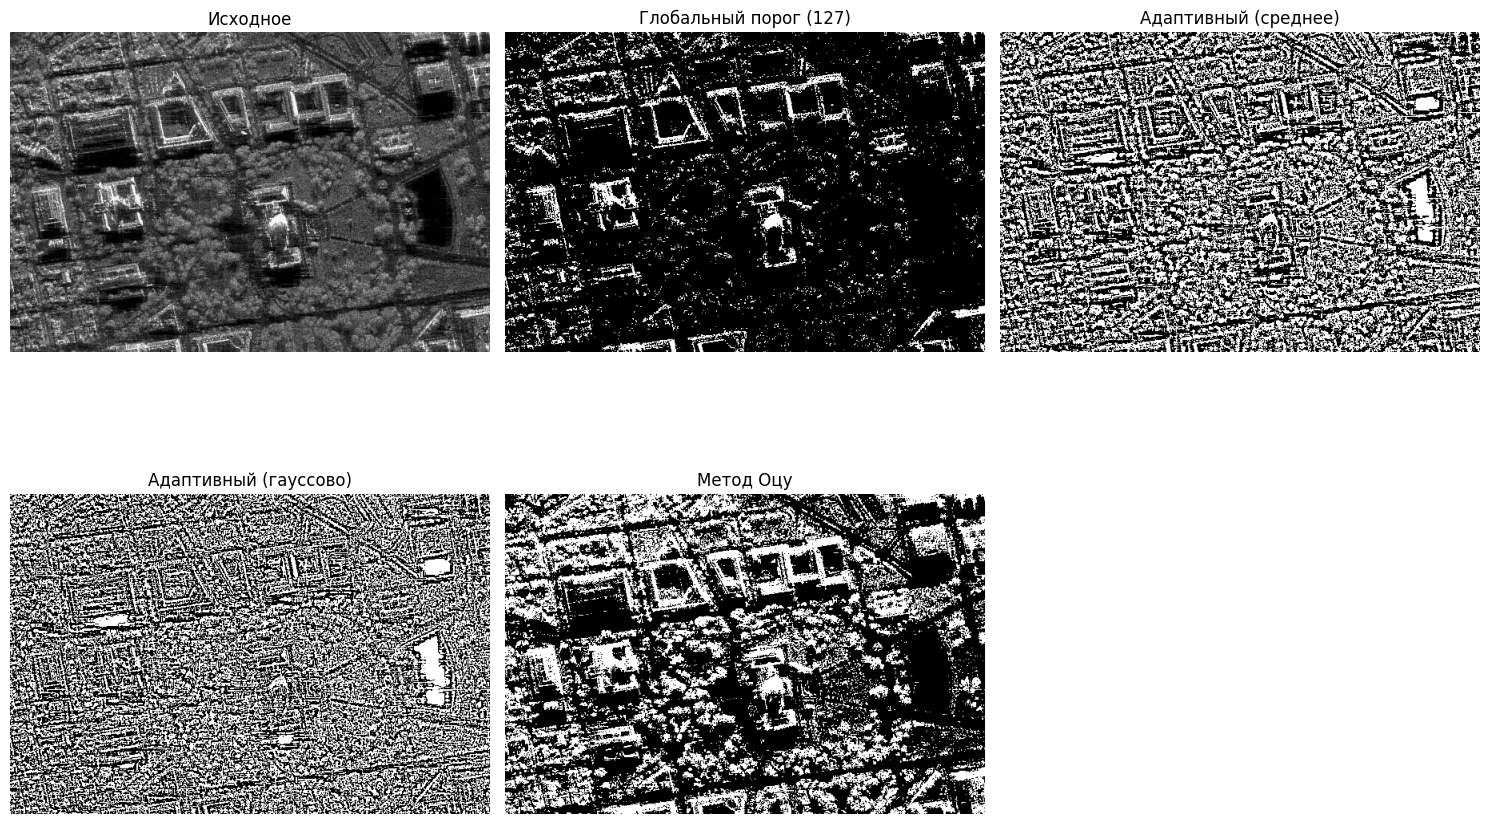

In [86]:
# Глобальный порог (фиксированное значение 127)
_, th_global = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# Адаптивные пороги (размер окна 11, константа C=2)
th_mean = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th_gauss = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Метод Оцу (автоматический порог)
_, th_otsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Отображение всех результатов
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Исходное')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(th_global, cmap='gray')
plt.title('Глобальный порог (127)')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(th_mean, cmap='gray')
plt.title('Адаптивный (среднее)')
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(th_gauss, cmap='gray')
plt.title('Адаптивный (гауссово)')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(th_otsu, cmap='gray')
plt.title('Метод Оцу')
plt.axis('off')

plt.tight_layout()
plt.show()

Другие параметры адаптивного порога

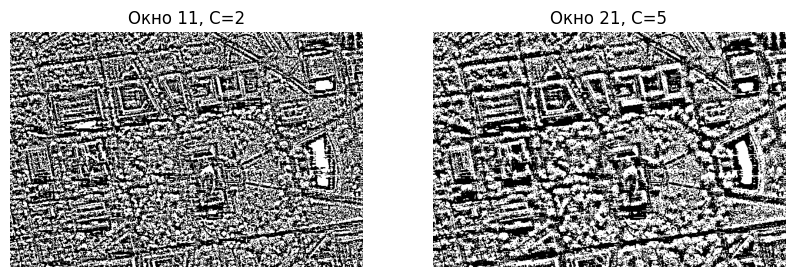

In [87]:
th_mean_21 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 5)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(th_mean, cmap='gray')
plt.title('Окно 11, C=2')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(th_mean_21, cmap='gray')
plt.title('Окно 21, C=5')
plt.axis('off')
plt.show()

# Функция сравнения двух изображений

In [ ]:
def compare_mean_std(img1, img2, name1="Изображение 1", name2="Изображение 2"):
    mean1, std1 = np.mean(img1), np.std(img1)
    mean2, std2 = np.mean(img2), np.std(img2)
    diff_mean = abs(mean1 - mean2)
    diff_std = abs(std1 - std2)
    print(f"\nСравнение {name1} и {name2}:")
    print(f"  Среднее: {mean1:.2f} vs {mean2:.2f}, разница = {diff_mean:.2f}")
    print(f"  Стд.откл.: {std1:.2f} vs {std2:.2f}, разница = {diff_std:.2f}")
    return diff_mean, diff_std